In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [27]:
X = iris.data[:,[0,2]]
y = iris.target
feature_names = [iris.feature_names[0],iris.feature_names[2]]
x = pd.DataFrame(X)
y = pd.DataFrame(y)


In [28]:
print(x.isnull().sum())

0    0
1    0
dtype: int64


In [29]:
print(set(y))
print(iris.target_names)

{0}
['setosa' 'versicolor' 'virginica']


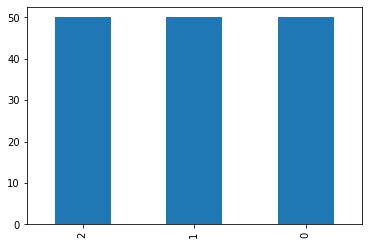

In [30]:
y[0].value_counts().plot(kind='bar')

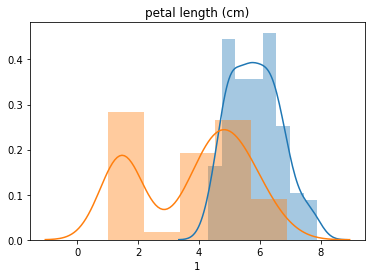

In [31]:
for i in range(x.shape[1]):
    sns.distplot(x[i])
    plt.title(feature_names[i])

In [34]:
pca = PCA(n_components=2) #2개 변수
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca.explained_variance_) #eigen value
pcscore = pca.transform(X)
print(pcscore[0:5])

[3.66189877 0.1400726 ]
[[-2.46024094 -0.24479165]
 [-2.53896211 -0.06093579]
 [-2.70961121  0.08355948]
 [-2.56511594  0.25420858]
 [-2.49960153 -0.15286372]]


In [36]:
eigens_v = pca.components_.transpose() #transpose하기
mx = np.matrix(X)
for i in range(x.shape[1]):
    mx[:,i] = mx[:,i]-np.mean(X[:,i])
dfmx = pd.DataFrame(mx)

In [37]:
(mx*eigens_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

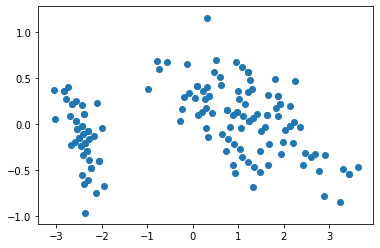

In [38]:
plt.scatter(pcscore[:,0],pcscore[:,1])

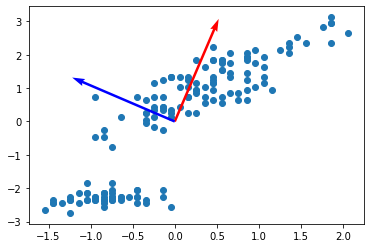

In [39]:
plt.scatter(dfmx[0],dfmx[1]) #원래 데이터
origin = [0], [0]
plt.quiver(*origin,eigens_v[0,:],eigens_v[1:],color= ['r','b'],scale=3)

In [41]:
x2= iris.data
pca2 = PCA(n_components=4)
pca2.fit(x2)

pcs = pca2.transform(x2)[:,0:2]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver="sag", multi_class="multinomial").fit(x2,y) 
#sovler가 해를 구함 위에서는 해를 구할수 없다 함

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [46]:
clf2 = LogisticRegression(solver="sag", multi_class="multinomial").fit(pcs,y) 

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
confusion_matrix(y,clf2.predict(pcs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [50]:
clf = LogisticRegression(solver="sag", max_iter=1000,random_state=0, multi_class="multinomial").fit(x2[:,0:2],y) 

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
confusion_matrix(y,clf.predict(pcs))

array([[50,  0,  0],
       [49,  1,  0],
       [10, 40,  0]], dtype=int64)